In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import warnings
warnings.filterwarnings(action='ignore')
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,r2_score,accuracy_score,classification_report
from sklearn.metrics import recall_score,f1_score,precision_recall_curve,precision_score

## There are two set of Data availble 1. Test dataset 2. Training dataset. so we are working on Training dataset.

In [2]:
df = pd.read_csv(r'D:\Internship on ML\train.csv', encoding= 'latin1')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,3,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,3,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,3,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,3,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1,8,2,15,1,1,0,1


In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('----------------------')

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64
----------------------
blue
0    1010
1     990
Name: count, dtype: int64
----------------------
clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64
----------------------
dual_sim
1    1019
0     981
Name: count, dtype: int64
----------------------
fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64
----------------------
four_g
1    1043
0     957
Name: count, dtype: int64
---------

## EDA 

In [7]:
ds = round(df.dual_sim.value_counts(normalize=True)*100,2)
print ({ 0:'No',1:'Yes'},'\n', ds)

{0: 'No', 1: 'Yes'} 
 dual_sim
1    50.95
0    49.05
Name: proportion, dtype: float64


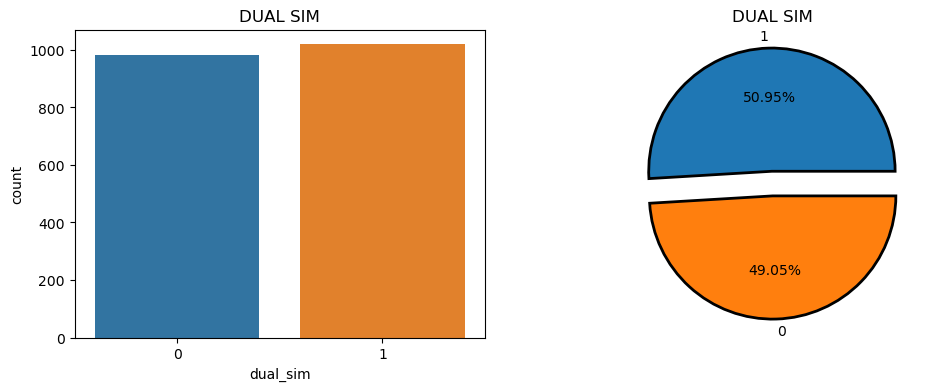

<Axes: title={'center': 'DUAL SIM'}, xlabel='dual_sim', ylabel='count'>

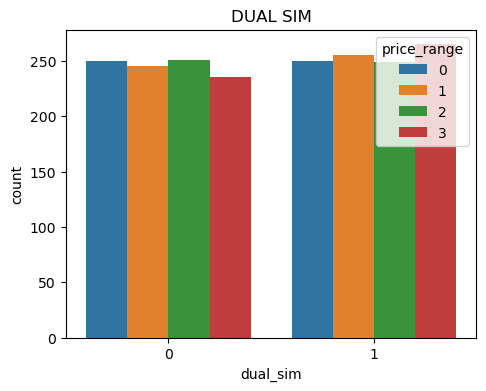

In [8]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("DUAL SIM")
sns.countplot(x="dual_sim",data = df,)

plt.subplot(1,3,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df["dual_sim"].value_counts(),labels=ds.index,autopct='%.2f%%',startangle=0,wedgeprops= wp,explode =[0.1,0.1])
plt.title("DUAL SIM")
plt.show()

plt.figure(figsize=(18,4))
plt.subplot(1,3,3)
plt.title("DUAL SIM")
sns.countplot(x="dual_sim",hue="price_range",data = df)

In [9]:
fg= round(df.four_g.value_counts(normalize=True)*100,2)
print({0: 'No - 4g not Enable',1: "Yes - 4g Enable"},'\n',fg)

{0: 'No - 4g not Enable', 1: 'Yes - 4g Enable'} 
 four_g
1    52.15
0    47.85
Name: proportion, dtype: float64


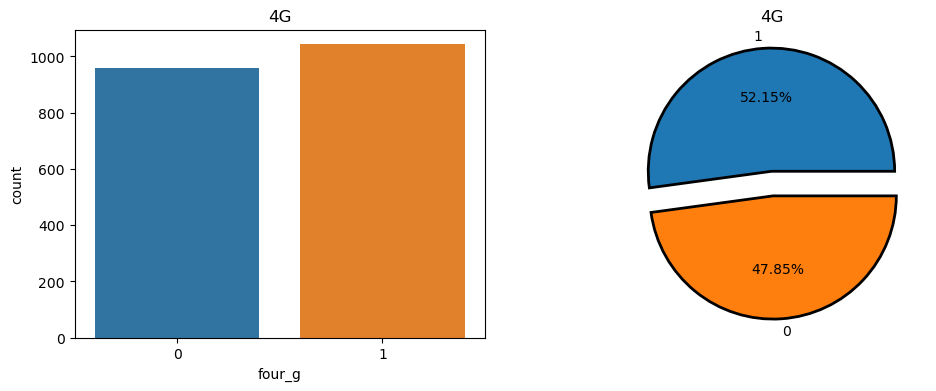

<Axes: title={'center': '4G'}, xlabel='four_g', ylabel='count'>

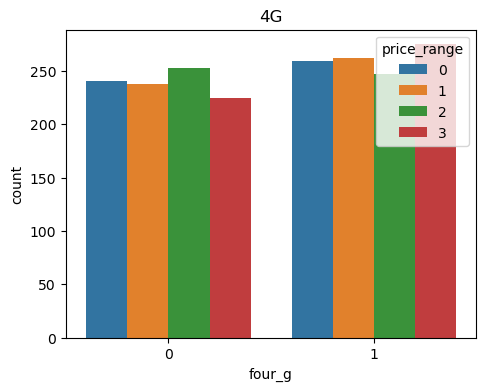

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("4G")
sns.countplot(x="four_g",data = df,)

plt.subplot(1,3,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df["four_g"].value_counts(),labels=fg.index,autopct='%.2f%%',startangle=0,wedgeprops= wp,explode =[0.1,0.1])
plt.title("4G")
plt.show()

plt.figure(figsize=(18,4))
plt.subplot(1,3,3)
plt.title("4G")
sns.countplot(x="four_g",hue="price_range",data = df)

In [11]:
gb= round(df.ram.value_counts(normalize=True)*100,2)
print({1: "1gb RAM", 2: '2gb RAM',3:'3gb RAM',4:'4gb RAM'},'\n',gb)

{1: '1gb RAM', 2: '2gb RAM', 3: '3gb RAM', 4: '4gb RAM'} 
 ram
1    34.05
2    26.45
3    26.00
4    13.50
Name: proportion, dtype: float64


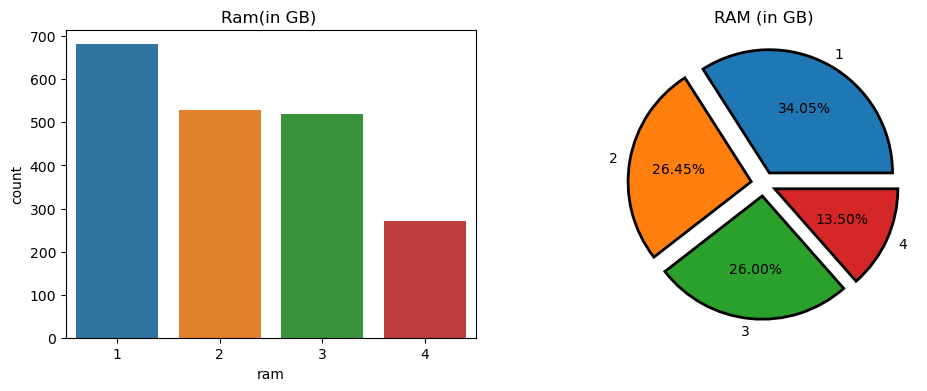

<Axes: title={'center': 'Ram(in GB) '}, xlabel='ram', ylabel='count'>

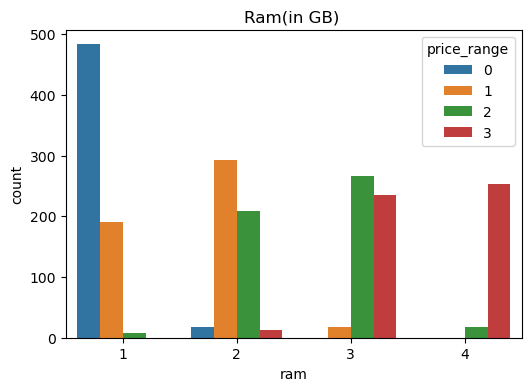

In [12]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("Ram(in GB) ")
sns.countplot(x="ram",data = df,)

plt.subplot(1,3,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df["ram"].value_counts(),labels=gb.index,autopct='%.2f%%',startangle=0,wedgeprops= wp,explode =[0.1,0.1,0.1,0.1])
plt.title("RAM (in GB)")
plt.show()

plt.figure(figsize=(20,4))
plt.subplot(1,3,3)
plt.title("Ram(in GB) ")
sns.countplot(x="ram",hue="price_range",data = df)

<Axes: title={'center': 'Front Camera(Megapixel)'}, xlabel='fc', ylabel='count'>

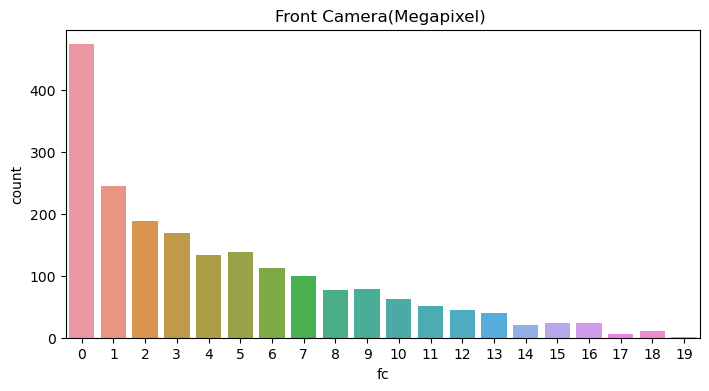

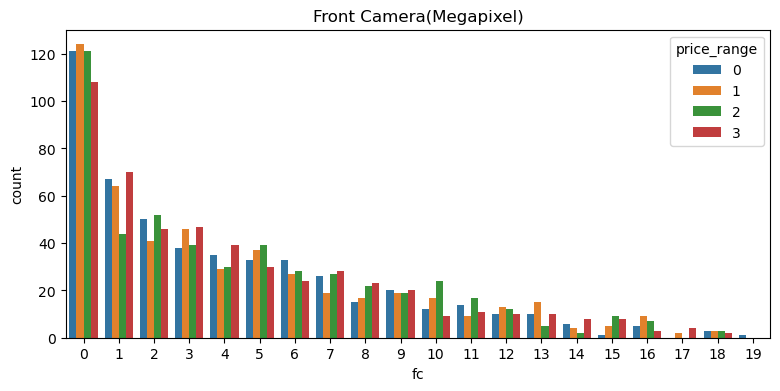

In [13]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title("Front Camera(Megapixel) ")
sns.countplot(x="fc",data = df,)


plt.figure(figsize=(20,4))
plt.subplot(1,2,2)
plt.title("Front Camera(Megapixel)")
sns.countplot(x="fc",hue="price_range",data = df)


<Axes: title={'center': 'Primary Camera(Megapixel)'}, xlabel='pc', ylabel='count'>

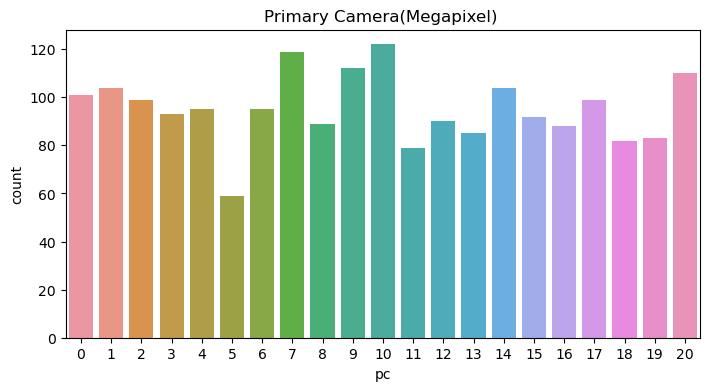

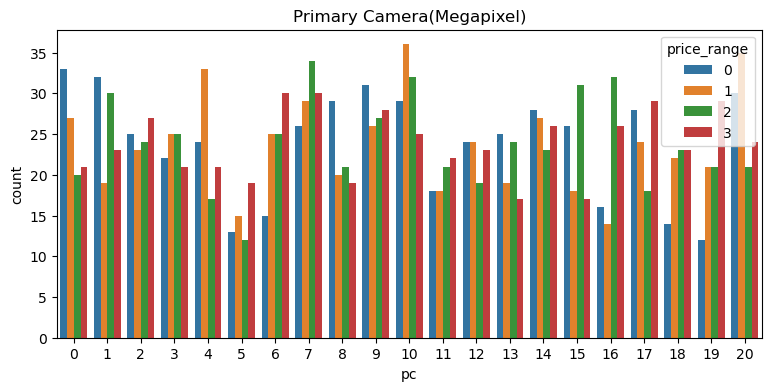

In [14]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title("Primary Camera(Megapixel) ")
sns.countplot(x="pc",data = df,)


plt.figure(figsize=(20,4))
plt.subplot(1,2,2)
plt.title("Primary Camera(Megapixel)")
sns.countplot(x="pc",hue="price_range",data = df)


In [15]:
tg= round(df.three_g.value_counts(normalize=True)*100,2)
print({0: 'No - 3g not Enable',1: "Yes - 3g Enable"},'\n',tg)

{0: 'No - 3g not Enable', 1: 'Yes - 3g Enable'} 
 three_g
1    76.15
0    23.85
Name: proportion, dtype: float64


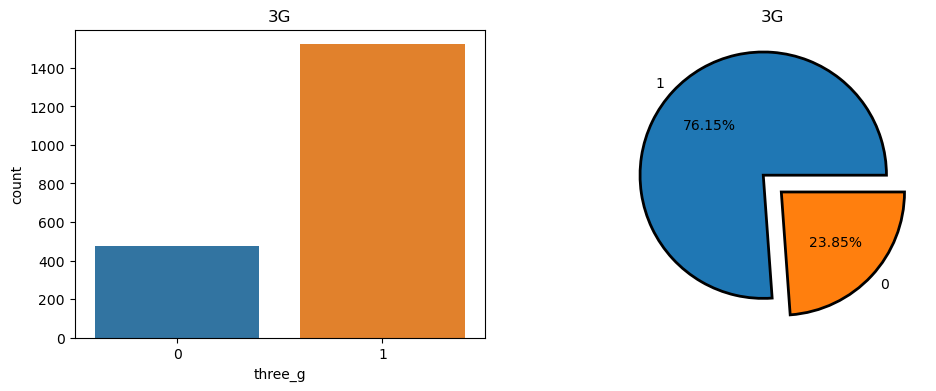

<Axes: title={'center': '3G'}, xlabel='three_g', ylabel='count'>

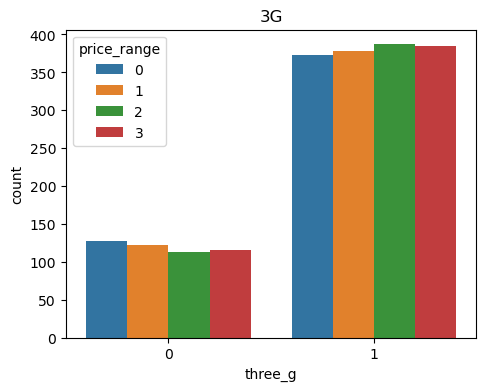

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("3G")
sns.countplot(x="three_g",data = df,)

plt.subplot(1,3,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df["three_g"].value_counts(),labels=tg.index,autopct='%.2f%%',startangle=0,wedgeprops= wp,explode =[0.1,0.1])
plt.title("3G")
plt.show()

plt.figure(figsize=(18,4))
plt.subplot(1,3,3)
plt.title("3G")
sns.countplot(x="three_g",hue="price_range",data = df)

In [17]:
tc_sc= round(df.touch_screen.value_counts(normalize=True)*100,2)
print({0: 'No - Touch Screen not Enable',1: "Yes - Touch Screen enable "},'\n',tc_sc)

{0: 'No - Touch Screen not Enable', 1: 'Yes - Touch Screen enable '} 
 touch_screen
1    50.3
0    49.7
Name: proportion, dtype: float64


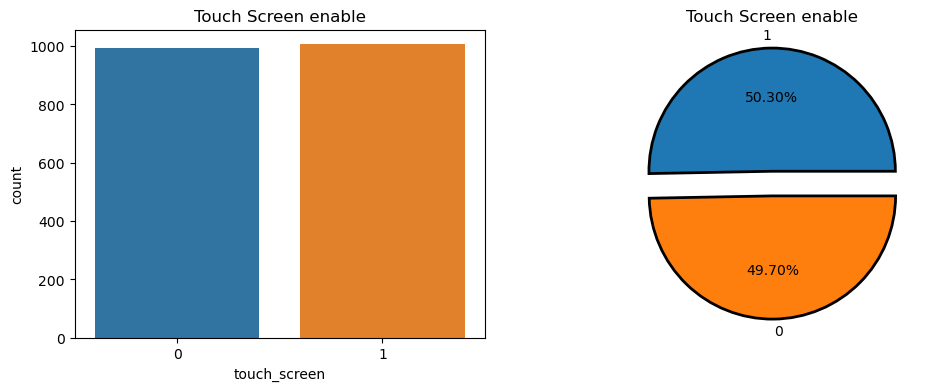

<Axes: title={'center': 'Touch Screen enable'}, xlabel='touch_screen', ylabel='count'>

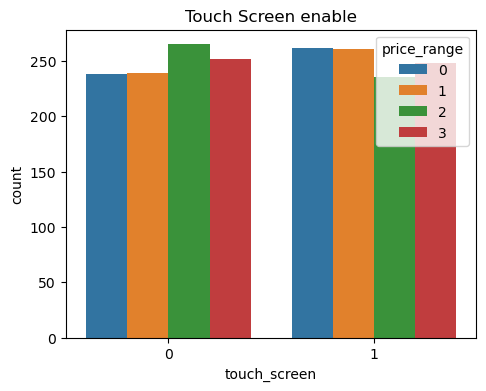

In [18]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("Touch Screen enable")
sns.countplot(x="touch_screen",data = df,)

plt.subplot(1,3,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df["touch_screen"].value_counts(),labels=tc_sc.index,autopct='%.2f%%',startangle=0,wedgeprops= wp,explode =[0.1,0.1])
plt.title("Touch Screen enable")
plt.show()

plt.figure(figsize=(18,4))
plt.subplot(1,3,3)
plt.title("Touch Screen enable")
sns.countplot(x="touch_screen",hue="price_range",data = df)

In [19]:
wf= round(df.wifi.value_counts(normalize=True)*100,2)
print({0:"No - Wifi is not enable",1:"Yes - Wifi Enable"},"\n",wf)

{0: 'No - Wifi is not enable', 1: 'Yes - Wifi Enable'} 
 wifi
1    50.7
0    49.3
Name: proportion, dtype: float64


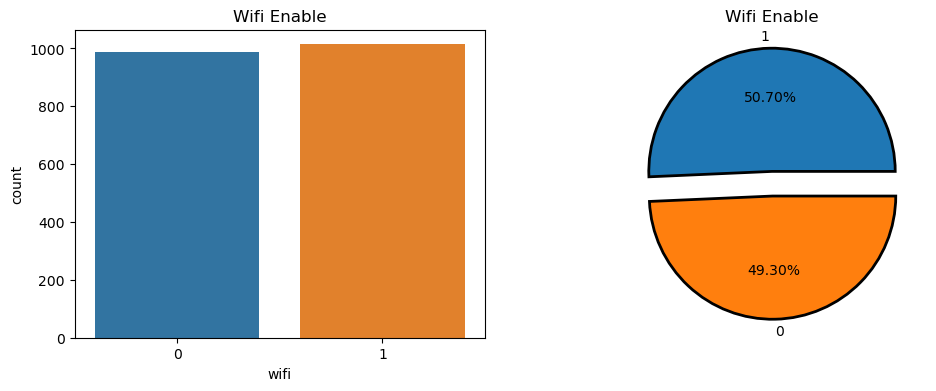

<Axes: title={'center': 'Wifi Enable'}, xlabel='wifi', ylabel='count'>

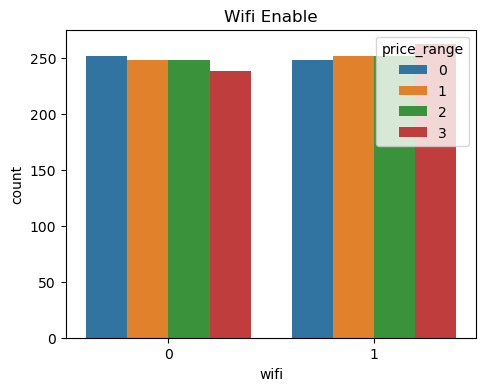

In [20]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("Wifi Enable")
sns.countplot(x="wifi",data = df,)

plt.subplot(1,3,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df["wifi"].value_counts(),labels=wf.index,autopct='%.2f%%',startangle=0,wedgeprops= wp,explode =[0.1,0.1])
plt.title("Wifi Enable")
plt.show()

plt.figure(figsize=(18,4))
plt.subplot(1,3,3)
plt.title("Wifi Enable")
sns.countplot(x="wifi",hue="price_range",data = df)

In [21]:
pr = round(df.price_range.value_counts(normalize=True)*100,2)
print({0:'Low Cost', 1:'Medium Cost', 2:'High Cost', 3:'Very High Cost'},'\n',pr)

{0: 'Low Cost', 1: 'Medium Cost', 2: 'High Cost', 3: 'Very High Cost'} 
 price_range
1    25.0
2    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64


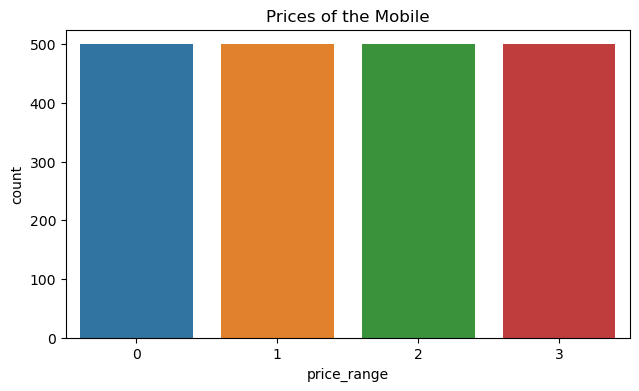

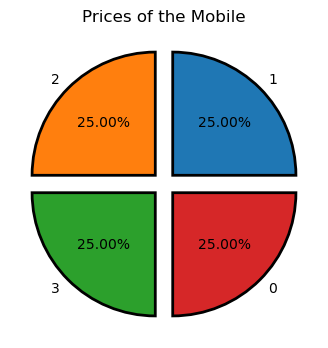

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Prices of the Mobile")
sns.countplot(x="price_range",data = df,)

plt.figure(figsize=(16,4))
plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df["price_range"].value_counts(),labels=pr.index,autopct='%.2f%%',startangle=0,wedgeprops= wp,explode =[0.1,0.1,0.1,0.1])
plt.title("Prices of the Mobile")
plt.show()



Text(0, 0.5, 'Price of the Mobile')

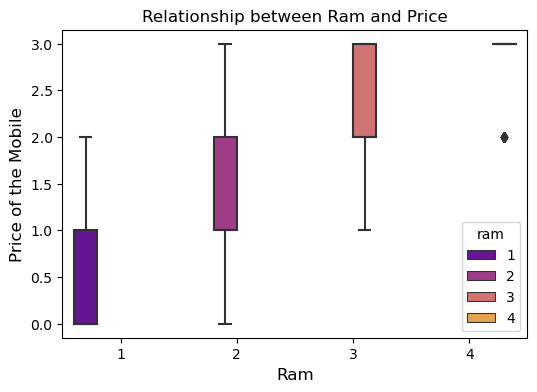

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df, x= 'ram',y ='price_range', hue='ram',palette='plasma')
plt.title('Relationship between Ram and Price')
plt.xlabel("Ram", fontsize = 12)
plt.ylabel('Price of the Mobile', fontsize =12)

Text(0, 0.5, 'Price of the Mobile')

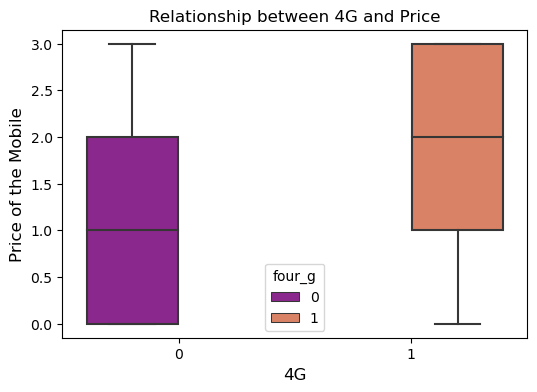

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df, x= 'four_g',y ='price_range', hue='four_g',palette='plasma')
plt.title('Relationship between 4G and Price')
plt.xlabel("4G", fontsize = 12)
plt.ylabel('Price of the Mobile', fontsize =12)

In [25]:
from statsmodels.stats import descriptivestats

In [26]:
descriptivestats.describe(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
nobs,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
missing,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mean,1.238518e+03,4.950000e-01,1.522250e+00,5.095000e-01,4.309500e+00,5.215000e-01,3.204650e+01,5.017500e-01,1.402490e+02,4.520500e+00,...,6.451080e+02,1.251515e+03,2.189500e+00,1.230650e+01,5.767000e+00,1.101100e+01,7.615000e-01,5.030000e-01,5.070000e-01,1.500000e+00
std_err,9.825690e+00,1.118258e-02,1.824641e-02,1.118112e-02,9.707763e-02,1.117279e-02,4.057505e-01,6.449168e-03,7.915603e-01,5.115758e-02,...,9.923241e+00,9.664273e+00,2.350683e-02,9.421102e-02,9.741201e-02,1.221778e-01,9.531752e-03,1.118293e-02,1.118204e-02,2.500625e-02
upper_ci,1.257776e+03,5.169174e-01,1.558012e+00,5.314146e-01,4.499769e+00,5.433983e-01,3.284176e+01,5.143901e-01,1.418004e+02,4.620767e+00,...,6.645572e+02,1.270457e+03,2.235573e+00,1.249115e+01,5.957924e+00,1.125046e+01,7.801819e-01,5.249181e-01,5.289164e-01,1.549011e+00
lower_ci,1.219261e+03,4.730826e-01,1.486488e+00,4.875854e-01,4.119231e+00,4.996017e-01,3.125124e+01,4.891099e-01,1.386976e+02,4.420233e+00,...,6.256588e+02,1.232574e+03,2.143427e+00,1.212185e+01,5.576076e+00,1.077154e+01,7.428181e-01,4.810819e-01,4.850836e-01,1.450989e+00
std,4.394182e+02,5.001000e-01,8.160042e-01,5.000348e-01,4.341444e+00,4.996625e-01,1.814571e+01,2.884155e-01,3.539965e+01,2.287837e+00,...,4.437808e+02,4.321994e+02,1.051257e+00,4.213245e+00,4.356398e+00,5.463955e+00,4.262729e-01,5.001160e-01,5.000760e-01,1.118314e+00
iqr,7.635000e+02,1.000000e+00,1.500000e+00,1.000000e+00,6.000000e+00,1.000000e+00,3.200000e+01,6.000000e-01,6.100000e+01,4.000000e+00,...,6.645000e+02,7.582500e+02,2.000000e+00,7.000000e+00,7.000000e+00,1.000000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.500000e+00
iqr_normal,5.659834e+02,7.413011e-01,1.111952e+00,7.413011e-01,4.447807e+00,7.413011e-01,2.372164e+01,4.447807e-01,4.521937e+01,2.965204e+00,...,4.925946e+02,5.620916e+02,1.482602e+00,5.189108e+00,5.189108e+00,7.413011e+00,0.000000e+00,7.413011e-01,7.413011e-01,1.111952e+00
mad,3.820418e+02,4.999500e-01,7.176400e-01,4.998195e-01,3.553805e+00,4.990755e-01,1.576071e+01,2.504338e-01,3.068300e+01,1.991184e+00,...,3.663484e+02,3.728546e+02,9.102950e-01,3.643872e+00,3.622496e+00,4.741616e+00,3.632355e-01,4.999820e-01,4.999020e-01,1.000000e+00


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [28]:
cor = df.corr().round(2)
cor

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.00,0.01,0.01,-0.04,0.03,0.02,-0.00,0.03,0.00,-0.03,...,0.01,-0.01,-0.00,-0.03,-0.02,0.05,0.01,-0.01,-0.01,0.20
blue,0.01,1.00,0.02,0.04,0.00,0.01,0.04,0.00,-0.01,0.04,...,-0.01,-0.04,0.03,-0.00,0.00,0.01,-0.03,0.01,-0.02,0.02
clock_speed,0.01,0.02,1.00,-0.00,-0.00,-0.04,0.01,-0.01,0.01,-0.01,...,-0.01,-0.01,-0.00,-0.03,-0.01,-0.01,-0.05,0.02,-0.02,-0.01
dual_sim,-0.04,0.04,-0.00,1.00,-0.03,0.00,-0.02,-0.02,-0.01,-0.02,...,-0.02,0.01,0.04,-0.01,-0.02,-0.04,-0.01,-0.02,0.02,0.02
fc,0.03,0.00,-0.00,-0.03,1.00,-0.02,-0.03,-0.00,0.02,-0.01,...,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,0.02
four_g,0.02,0.01,-0.04,0.00,-0.02,1.00,0.01,-0.00,-0.02,-0.03,...,-0.02,0.01,0.01,0.03,0.04,-0.05,0.58,0.02,-0.02,0.01
int_memory,-0.00,0.04,0.01,-0.02,-0.03,0.01,1.00,0.01,-0.03,-0.03,...,0.01,-0.01,0.03,0.04,0.01,-0.00,-0.01,-0.03,0.01,0.04
m_dep,0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.01,1.00,0.02,-0.00,...,0.03,0.02,-0.01,-0.03,-0.02,0.02,-0.01,-0.00,-0.03,0.00
mobile_wt,0.00,-0.01,0.01,-0.01,0.02,-0.02,-0.03,0.02,1.00,-0.02,...,0.00,0.00,-0.00,-0.03,-0.02,0.01,0.00,-0.01,-0.00,-0.03
n_cores,-0.03,0.04,-0.01,-0.02,-0.01,-0.03,-0.03,-0.00,-0.02,1.00,...,-0.01,0.02,-0.00,-0.00,0.03,0.01,-0.01,0.02,-0.01,0.00


<Axes: >

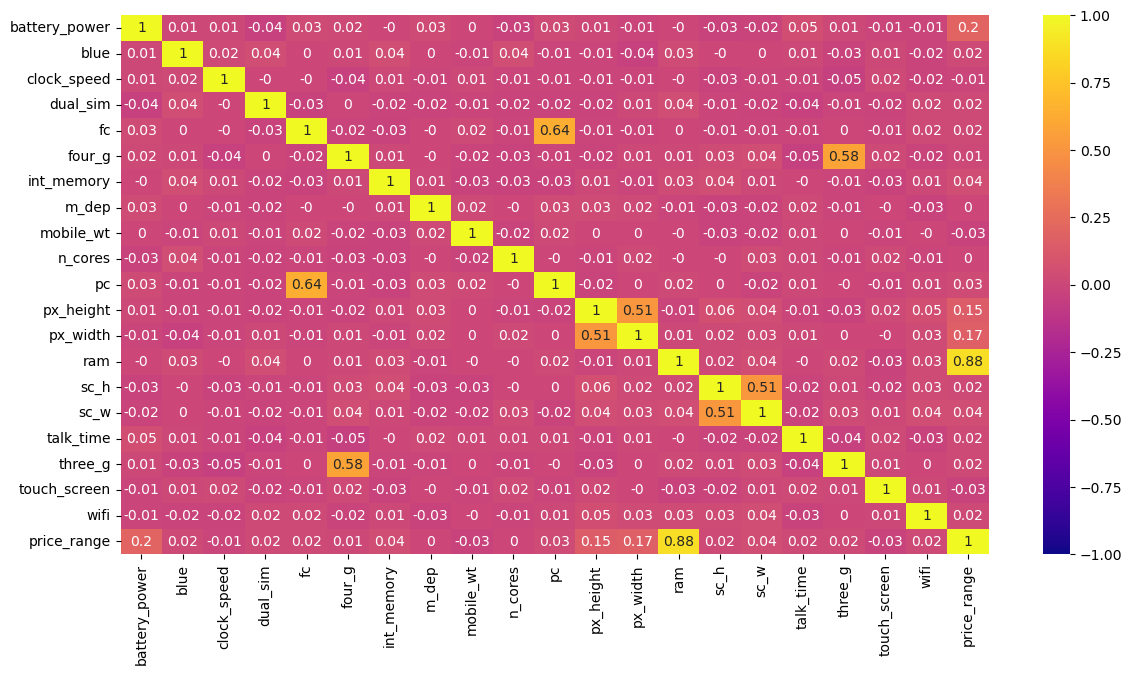

In [29]:
fig,ax = plt.subplots(figsize=(14,7))
sns.heatmap(cor,ax=ax,vmin=-1,vmax=1,center=0, annot=True,cmap ='plasma')

### Feature Engineering

In [30]:
for column in df.columns:
    print(column,df[column].nunique())

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 4
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4


In [31]:
le = LabelEncoder()

In [32]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,3,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,3,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,3,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,3,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,1,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,1,18,10,19,1,1,1,0


In [33]:
df1=df.copy()

## Minmax SCALER

In [34]:
scaler = MinMaxScaler()

In [35]:
for column in df1.columns:
    if column != "price_range":
        df1[column]= scaler.fit_transform(np.array(df1[column]).reshape(-1,1))

In [36]:
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.666667,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.666667,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.666667,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.666667,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.000000,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.000000,0.571429,0.222222,0.944444,1.0,1.0,0.0,0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.333333,0.428571,0.555556,0.777778,1.0,1.0,1.0,2
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.666667,0.285714,0.055556,0.166667,1.0,1.0,0.0,3
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.000000,0.928571,0.555556,0.944444,1.0,1.0,1.0,0


## Divide the into x & y
Input features

Target varible which is "price_range"

In [37]:
x = df1.drop('price_range',axis=1)
y = df1['price_range']

## Model Building
Train-Test Split

20% test data - xtest , ytest - actual target variable

80% train data - xtrain,ytrain

xtrain - i/p features for train data

ytrain - target variable for train data

xtest -i/p features for test data

ytest is actual target variable for test data

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(1600, 20)
xtest shape(400, 20)
ytrain shape(1600,)
ytest shape(400,)


In [40]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,0.949900,0.0,0.00,1.0,0.368421,0.0,0.709677,0.444444,0.925000,0.000000,0.50,0.391327,0.840454,0.000000,0.357143,0.500000,0.055556,1.0,1.0,1.0
240,0.088176,1.0,0.68,0.0,0.000000,1.0,0.758065,0.000000,0.491667,1.000000,0.05,0.269898,0.339786,1.000000,0.428571,0.055556,0.777778,1.0,1.0,1.0
819,0.490982,0.0,0.16,1.0,0.105263,1.0,0.887097,0.000000,0.900000,0.000000,0.70,0.263776,0.206275,0.000000,0.642857,0.666667,1.000000,1.0,0.0,1.0
692,0.187041,0.0,0.24,0.0,0.105263,0.0,0.580645,0.333333,0.983333,0.571429,0.35,0.155102,0.783712,1.000000,0.571429,0.444444,0.166667,0.0,0.0,1.0
420,0.637943,1.0,0.00,1.0,0.368421,0.0,0.080645,0.333333,0.208333,0.571429,0.60,0.419898,0.403204,0.333333,0.071429,0.277778,1.000000,1.0,0.0,1.0


In [41]:
def helper(model,xtrain,ytrain,xtest,ytest):
    train_pred= model.predict(xtrain)
    test_pred = model.predict(xtest)
    
    train_acc = accuracy_score(train_pred,ytrain)
    test_acc = accuracy_score(test_pred,ytest)
    acc_mat= {'Train accuracy': train_acc,"Test accuracy": test_acc,}
    
    print('\nTraining Accuracy Score :', train_acc)
    print('Testing Accuracy Score :', test_acc)
   
    print('\n====================================================')
    print('Classification Report on Train Data')
    print(classification_report(train_pred, ytrain))
    print('\n====================================================')
    print('Classification Report on Test Data')
    print(classification_report(test_pred, ytest))
    
    print('\n====================================================')
    
    
   
    return acc_mat

## Base Model

### Decision tree Classifier

In [42]:
dtc = DecisionTreeClassifier()

In [57]:
%%time
dtc= DecisionTreeClassifier(max_depth=3,max_features=4,criterion="gini")
dtc= dtc.fit(xtrain,ytrain)

Acc_mat_dtc = helper(dtc,xtrain,ytrain,xtest,ytest)


Training Accuracy Score : 0.665625
Testing Accuracy Score : 0.67

Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       547
           1       0.54      0.62      0.58       358
           2       0.38      0.61      0.47       257
           3       0.79      0.70      0.74       438

    accuracy                           0.67      1600
   macro avg       0.67      0.66      0.65      1600
weighted avg       0.73      0.67      0.68      1600


Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       134
           1       0.56      0.59      0.57        87
           2       0.34      0.48      0.39        65
           3       0.75      0.74      0.74       114

    accuracy                           0.67       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.72      0.67      0.69   

In [59]:
train_pred = dtc.predict(xtrain)
test_pred = dtc.predict(xtest)

In [60]:
dtc_acc= round(accuracy_score(ytest,test_pred)*100,2)
print('Accuracy score:', dtc_acc)

Accuracy score: 67.0


### Random Forest Classifier

In [63]:
%%time
rfc= RandomForestClassifier(oob_score=True,n_estimators = 100, max_depth=10)
rfc = rfc.fit(xtrain,ytrain)

Acc_mat_rfc = helper(rfc,xtrain,ytrain,xtest,ytest)


Training Accuracy Score : 0.9925
Testing Accuracy Score : 0.7575

Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       392
           1       0.99      0.99      0.99       408
           2       0.99      0.99      0.99       411
           3       1.00      0.99      1.00       389

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600


Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       117
           1       0.58      0.69      0.63        77
           2       0.67      0.63      0.65        99
           3       0.82      0.86      0.84       107

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.77      0.76      0.76   

In [64]:
train_pred= rfc.predict(xtrain)
test_pred =rfc.predict(xtest)

In [65]:
rfc_acc= round(accuracy_score(ytest,test_pred)*100,2)
print('Accuracy Score:',rfc_acc)

Accuracy Score: 75.75


### Adaboost Classifier

In [66]:
%%time
adc= AdaBoostClassifier(n_estimators=200,random_state=42)
adc =adc.fit(xtrain,ytrain)

Acc_mat_adc= helper(adc,xtrain,ytrain,xtest,ytest)


Training Accuracy Score : 0.69875
Testing Accuracy Score : 0.735

Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       462
           1       0.55      0.71      0.62       315
           2       0.60      0.58      0.59       423
           3       0.76      0.74      0.75       400

    accuracy                           0.70      1600
   macro avg       0.70      0.70      0.70      1600
weighted avg       0.72      0.70      0.70      1600


Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       122
           1       0.59      0.68      0.64        79
           2       0.59      0.59      0.59        91
           3       0.79      0.81      0.80       108

    accuracy                           0.73       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.75      0.73      0.74   

In [67]:
train_pred= adc.predict(xtrain)
test_pred = adc.predict(xtest)

In [68]:
adc_acc= round(accuracy_score(ytest,test_pred)*100,2)
print("Accuracy score :",adc_acc)

Accuracy score : 73.5


### Gradient Boosting Classifier

In [75]:
%%time
gdc = GradientBoostingClassifier(n_estimators=500,random_state=42)
gdc =gdc.fit(xtrain,ytrain)

Acc_mat_gdc = helper(gdc,xtrain,ytrain,xtest,ytest)


Training Accuracy Score : 1.0
Testing Accuracy Score : 0.74

Classification Report on Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       108
           1       0.65      0.64      0.64        92
           2       0.61      0.58      0.59        97
           3       0.79      0.85      0.82       103

    accuracy                           0.74       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.74      0.74       4

In [76]:
train_pred= gdc.predict(xtrain)
test_pred = gdc.predict(xtest)

In [77]:
gdc_acc= round(accuracy_score(ytest,test_pred)*100,2)
print("Accuracy Score:",gdc_acc)

Accuracy Score: 74.0


### Logistic Regression

In [69]:
%%time
lr= LogisticRegression()
lr= lr.fit(xtrain,ytrain)

Acc_mat_lr = helper(lr,xtrain,ytrain,xtest,ytest)


Training Accuracy Score : 0.786875
Testing Accuracy Score : 0.765

Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       436
           1       0.67      0.72      0.69       377
           2       0.73      0.74      0.73       406
           3       0.86      0.88      0.87       381

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600


Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       112
           1       0.65      0.68      0.66        87
           2       0.67      0.65      0.66        95
           3       0.82      0.87      0.84       106

    accuracy                           0.77       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.77      0.77  

In [70]:
train_pred= lr.predict(xtrain)
test_pred = lr.predict(xtest)

In [71]:
lr_acc= round(accuracy_score(ytest,test_pred)*100,2)
print('Accuracy Score:',lr_acc)

Accuracy Score: 76.5


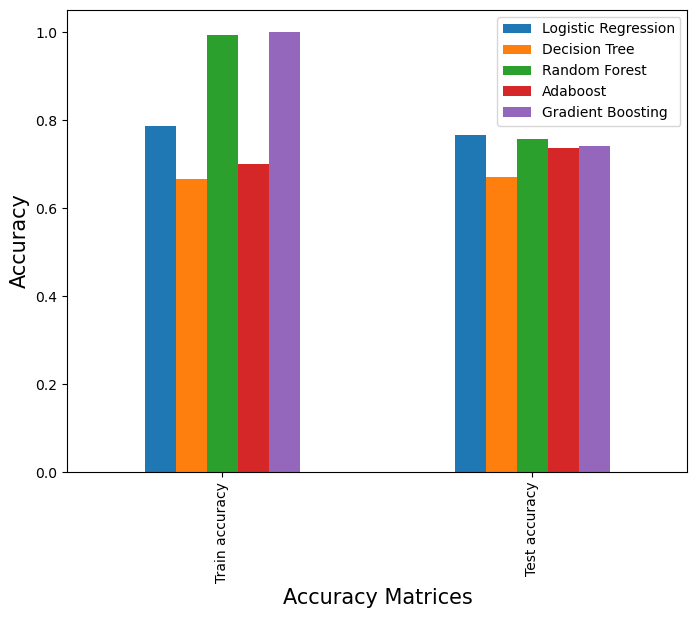

In [72]:
plot1=pd.DataFrame([Acc_mat_lr,Acc_mat_dtc,Acc_mat_rfc,Acc_mat_adc,Acc_mat_gdc], index=['Logistic Regression','Decision Tree','Random Forest','Adaboost','Gradient Boosting']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Accuracy Matrices",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

## Base model Conclusion

In [78]:
base_models=['Decision tree Classifier','Random Forest Classifier',
           'AdaBoost Classifier','Gradient Boosting Classifier',  
           'Logistic Regression']


accuracy_score=[dtc_acc,rfc_acc,adc_acc,lr_acc,gdc_acc]

base_models_conclusion = pd.DataFrame({'Models':base_models,"Accuracy":accuracy_score})
base_models_conclusion

,Models,Accuracy
0,Decision tree Classifier,67.00
1,Random Forest Classifier,75.75
2,AdaBoost Classifier,73.50
3,Gradient Boosting Classifier,76.50
4,Logistic Regression,74.00


### From the above Models we found the top 3 models with highest accuracy 

1.Gradient Boosting Classifier

2.Random Forest Classifier

3.Logistic Regression


## Out of top 3 model , we can deploy by using "Gradient Boosting Classifier"

## Hyperparameter tuning Using Grid search

## 1.Gradient Boosting Classifier





In [60]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5,scoring='accuracy',n_jobs=-1)

grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [80]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_test = best_model.predict(xtest)
y_pred_best_train = best_model.predict(xtrain)

print('Classification Report on Test Data')
print(classification_report(ytest, y_pred_best_test))
print('\n====================================================')
print('Classification Report on Train Data')
print(classification_report(ytrain, y_pred_best_train))



Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       105
           1       0.72      0.58      0.64        91
           2       0.60      0.67      0.64        92
           3       0.88      0.77      0.82       112

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.76      0.76      0.75       400


Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       395
           1       0.73      0.61      0.67       409
           2       0.70      0.68      0.69       408
           3       0.83      0.83      0.83       388

    accuracy                           0.76      1600
   macro avg       0.76      0.76      0.76      1600
weighted avg       0.76      0.76      0.76      1600



## 2.Random Forest Classifier

In [75]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
grid_search_rfc = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search_rfc.fit(xtrain, ytrain) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [82]:
best_params_rfc = grid_search_rfc.best_params_
best_model_rfc = grid_search_rfc.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_train_rfc = best_model_rfc.predict(xtrain)
y_pred_best_test_rfc = best_model_rfc.predict(xtest)

print('Classification Report on Test Data')
print(classification_report(ytest, y_pred_best_test_rfc))
print('\n====================================================')
print('Classification Report on Train Data')
print(classification_report(ytrain, y_pred_best_train_rfc))

Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       105
           1       0.73      0.54      0.62        91
           2       0.60      0.73      0.66        92
           3       0.89      0.75      0.82       112

    accuracy                           0.76       400
   macro avg       0.76      0.75      0.74       400
weighted avg       0.77      0.76      0.75       400


Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       395
           1       0.75      0.60      0.66       409
           2       0.71      0.75      0.73       408
           3       0.87      0.81      0.84       388

    accuracy                           0.77      1600
   macro avg       0.77      0.77      0.77      1600
weighted avg       0.77      0.77      0.77      1600



## 3.Logistic Regression

In [79]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
grid_search_lgc = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv = 3, verbose=True, n_jobs=-1) 

grid_search_lgc.fit(xtrain, ytrain) 

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [81]:
best_params_lgc = grid_search_lgc.best_params_
best_model_lgc = grid_search_lgc.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_train_lgc = best_model_lgc.predict(xtrain)
y_pred_best_test_lgc = best_model_lgc.predict(xtest)

print('Classification Report on Test Data')
print(classification_report(ytest, y_pred_best_test_lgc))
print('\n====================================================')
print('Classification Report on Train Data')
print(classification_report(ytrain, y_pred_best_train_lgc))

Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.69      0.68      0.69        91
           2       0.67      0.72      0.69        92
           3       0.88      0.81      0.85       112

    accuracy                           0.78       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.78      0.78      0.78       400


Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       395
           1       0.73      0.69      0.71       409
           2       0.74      0.76      0.75       408
           3       0.88      0.85      0.86       388

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



In [82]:
model = grid_search_lgc.fit(xtrain, ytrain)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [83]:
import pickle

In [84]:
print('Model Score:',model.score(xtest,ytest))
pickle.dump(model,open('Mobile Price Classification.pkl','wb'))

Model Score: 0.775


In [85]:
loaded_model = pickle.load(open('Mobile Price Classification.pkl','rb'))
print('Loaded model score',loaded_model.score(xtest,ytest))

Loaded model score 0.775


# Thank you